In [18]:
#Se borra todo lo que se encuentra en el entorno
rm(list=ls())

In [19]:
#Timeout y repositorio
options(timeout = 600)                    #10 minutos
options(repos = c(CRAN = 'https://cran.rstudio.com/')) #repositorio para no tener problemas al instalar paquetes

#Instalar paquetería necewsaria para trabajar con fuentes
install.packages(c('sysfonts', 'showtext'))


The downloaded binary packages are in
	/var/folders/wv/qn33ppwj6078glchqvgyx29m0000gn/T//RtmpeF0ZYY/downloaded_packages


In [20]:
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, ggplot2, janitor, srvyr, sysfonts, showtext)

Dataframe Ejemplo

In [25]:
# Dataframe de ejemplo CORREGIDO
set.seed(123)
df_final <- data.frame(
  ciclo = 2015:2045,
  
  # Observado hasta 2024 (histórico)
  Deseable = c(
    42.1, 43.5, 44.2, 45.0, 46.1, 47.3, 48.5, 49.8, 51.2, 52.5,  # 2015-2024
    seq(52.5, 60.0, length.out = 21)  # 2024-2045: Deseable = MEDIO
  ),
  
  # Inercial: el MENOR
  Inercial = c(
    rep(NA, 10),  # No existe antes de 2024
    seq(52.5, 56.0, length.out = 21)  # 2024-2045: MÁS BAJO
  ),
  
  # Transformador: el MAYOR
  Transformador = c(
    rep(NA, 10),
    seq(52.5, 62.0, length.out = 21)  # 2024-2045: MÁS ALTO
  )
)

# Asegurar que 2024 sea el mismo valor en los tres escenarios
df_final$Deseable[df_final$ciclo == 2024] <- 52.5
df_final$Inercial[df_final$ciclo == 2024] <- 52.5
df_final$Transformador[df_final$ciclo == 2024] <- 52.5

# Redondear a 2 decimales
df_final[, -1] <- round(df_final[, -1], 2)

# Ver resultado
df_final

ciclo,Deseable,Inercial,Transformador
<int>,<dbl>,<dbl>,<dbl>
2015,42.10,NA,NA
2016,43.50,NA,NA
2017,44.20,NA,NA
2018,45.00,NA,NA
2019,46.10,NA,NA
2020,47.30,NA,NA
2021,48.50,NA,NA
2022,49.80,NA,NA
2023,51.20,NA,NA


In [26]:
#Parámetros

#Año base
ano_base <- 2024

#Agregar fuente Roboto
font_add_google('Roboto', 'roboto')
showtext_auto()

#Tema para el gráfico
theme_set(theme_minimal(base_family = 'roboto', base_size = 10))
theme_update(
  axis.title = element_text(size = 12),
  plot.title = element_text(size = 14, hjust = 0.5, face = 'bold'),
  axis.text = element_text(size = 10),
  legend.text = element_text(size = 10),
  legend.title = element_text(size = 12))


In [27]:
#El dataframe debe contener las columnas: ciclo, Deseable, Inercial, Transformador

obs <- df_final %>% #observado
filter(ciclo <= ano_base)

fut <- df_final %>% #escenarios futuros
filter(ciclo >= ano_base)

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_text()`)."


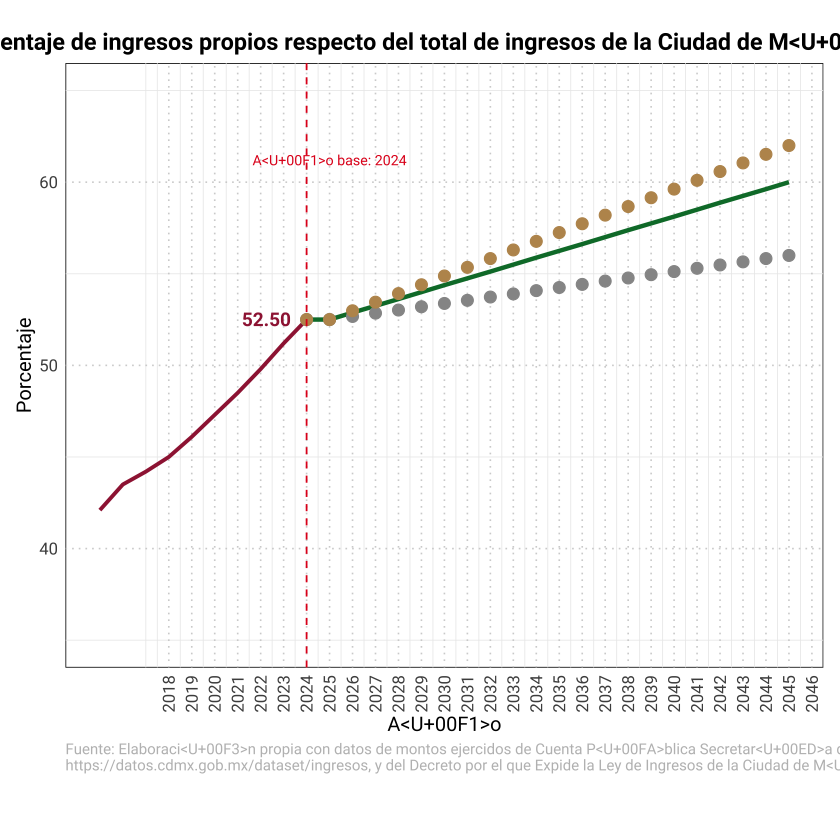

In [28]:
#Crear el gráfico
p <- ggplot() +
  
  #observado
  geom_line(data = obs, aes(x = ciclo, y = Deseable), 
            color = '#9F2241', linewidth = 1.1) +
  
  #escenarios futuros
  geom_line(data = fut, aes(x = ciclo, y = Deseable), 
            color = '#027a35', linewidth = 1.25) +
  geom_point(data = fut, aes(x = ciclo, y = Inercial), 
             color = '#969696', size = 3) +
  geom_point(data = fut, aes(x = ciclo, y = Transformador), 
             color = '#BC955C', size = 3) +
  
  #línea vertical
  geom_vline(xintercept = ano_base, color = '#E21F1F', linetype = 'dashed', linewidth = 0.5) +
  annotate('text', x = ano_base + 1, y = max(df_final$Deseable) * 1.02, 
           label = paste('Año base:', ano_base), size = 3, color = '#E21F1F', family = 'roboto') +
  
  #etiqueta valores
  annotate('text', x = ano_base - 1.75, y = df_final$Deseable[df_final$ciclo == ano_base] + 0.0125,
           label = sprintf('%.2f', df_final$Deseable[df_final$ciclo == ano_base]),
           size = 4, color = '#9F2241', fontface = 'bold', family = 'roboto') +
  
  annotate('text', x = 2045 + 0.4, y = df_final$Deseable[df_final$ciclo == 2045],
           label = sprintf('%.2f', df_final$Deseable[df_final$ciclo == 2045]),
           size = 4, color = '#027a35', fontface = 'bold', family = 'roboto') +
  
  annotate('text', x = 2045 + 0.4, y = df_final$Inercial[df_final$ciclo == 2045],
           label = sprintf('%.2f', df_final$Inercial[df_final$ciclo == 2045]),
           size = 4, color = '#969696', fontface = 'bold', family = 'roboto') +
  
  annotate('text', x = 2045 + 0.4, y = df_final$Transformador[df_final$ciclo == 2045],
           label = sprintf('%.2f', df_final$Transformador[df_final$ciclo == 2045]),
           size = 4, color = '#BC955C', fontface = 'bold', family = 'roboto') +
  
  #titulos y ejes
  labs(
    title = 'Porcentaje de ingresos propios respecto del total de ingresos de la Ciudad de México',
    x = 'Año',
    y = 'Porcentaje',
    caption = 'Fuente: Elaboración propia con datos de montos ejercidos de Cuenta Pública Secretaría de Administración y Finanzas, Ingresos de la Ciudad de México\nhttps://datos.cdmx.gob.mx/dataset/ingresos, y del Decreto por el que Expide la Ley de Ingresos de la Ciudad de México para el Ejercicio Fiscal 2025') +
  
  scale_y_continuous(limits = c(35, 65)) +
  scale_x_continuous(limits = c(min(df_final$ciclo), max(df_final$ciclo)),
                     breaks = seq(2018, 2048, by = 1)) +
  
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    legend.position = 'top',
    legend.background = element_rect(fill = 'white', color = NA),
    panel.grid.major = element_line(linetype = 'dotted', color = 'lightgray'),
    panel.background = element_rect(fill = 'white'),
    plot.caption = element_text(hjust = 0, size = 9, color = 'gray', family = 'roboto'),
    plot.margin = margin(t = 20, r = 10, b = 40, l = 10)) +
  
  guides(color = guide_legend(title = 'Escenarios'))

# --- GUARDAR Y MOSTRAR ---
#ggsave('grafica_ingresospropios.png', plot = p, width = 10, height = 8, dpi = 200, bg = 'white')
print(p)